# Capstone 1: The Fight Against Malaria
### Machine Learning

Here I will be attempting to fit a regression model to the data using the features to predict the point prevalence as an indicator of the impact of malaria in an area.

In [277]:
# Import Packages
import pandas as pd #for building dataframes from CSV files
import glob, os #for reading file names
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import matplotlib.pyplot as plt 
from math import sqrt
%matplotlib inline  
sns.set_context('poster')
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

In [278]:
# import the data
df_main = pd.read_csv('data/df_main.csv')
# df_main = df_main[df_main['reported_cases'] > 0]

In [279]:
df_main.columns

Index(['Unnamed: 0', 'year', 'country_code', 'reported_cases', 'region_x',
       'reported_deaths', 'region_y', 'rainfall', 'temperature', 'population',
       'country_name_x', 'percent_agg', 'percent_urb', 'country_name_y',
       'gdp_per_cap', 'country_name', 'pop_density', 'incidence'],
      dtype='object')

In [280]:
# What we are working with
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 18 columns):
Unnamed: 0         1075 non-null int64
year               1075 non-null int64
country_code       1075 non-null object
reported_cases     1075 non-null float64
region_x           1075 non-null object
reported_deaths    1075 non-null float64
region_y           1075 non-null object
rainfall           1075 non-null float64
temperature        1075 non-null float64
population         1075 non-null float64
country_name_x     1075 non-null object
percent_agg        1075 non-null float64
percent_urb        1075 non-null float64
country_name_y     1075 non-null object
gdp_per_cap        1075 non-null float64
country_name       1075 non-null object
pop_density        1075 non-null float64
incidence          1075 non-null float64
dtypes: float64(10), int64(2), object(6)
memory usage: 151.2+ KB


In [281]:
df_main.drop(['region_x', 'reported_cases', 'reported_deaths', 'population', 'country_name'], axis=1, inplace=True)

In [282]:
df_categories = pd.get_dummies(df_main, drop_first=True);

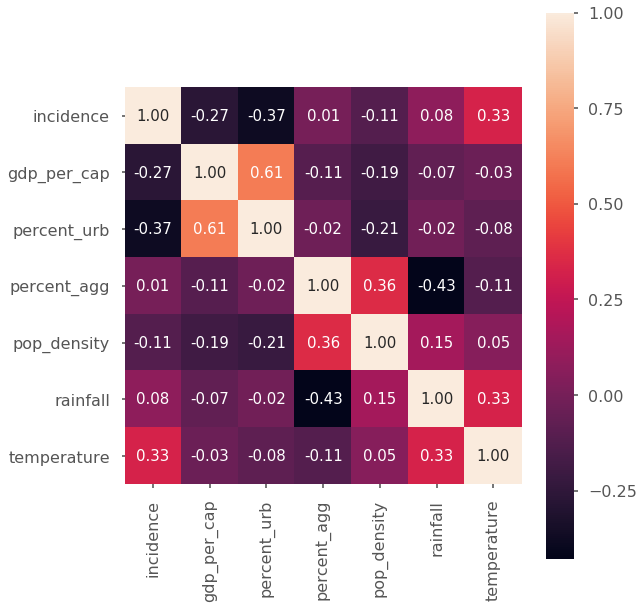

In [283]:
cols = ['incidence', 'gdp_per_cap', 'percent_urb', 'percent_agg', 'pop_density', 'rainfall', 'temperature' ]
f, ax = plt.subplots(figsize=(9,9))
cm = np.corrcoef(df_categories[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)


plt.tight_layout()
plt.show()

## Making the test sets

In [284]:
# Round 1
train_set_1 = df_categories[(df_categories['year'] >= 2000) & (df_categories['year'] <= 2009)]
test_set_1 = df_categories[(df_categories['year'] == 2010)]

y_train_1 = train_set_1['incidence']
X_train_1 = train_set_1.drop(['incidence', 'year'], axis=1)

y_test_1 = test_set_1['incidence']
X_test_1 = test_set_1.drop(['incidence', 'year'], axis=1)

# Round 2
train_set_2 = df_categories[(df_main['year'] >= 2000) & (df_categories['year'] <= 2010)]
test_set_2 =df_categories[(df_categories['year'] == 2011)]

y_train_2 = train_set_2['incidence']
X_train_2 = train_set_2.drop(['incidence', 'year'], axis=1)

y_test_2 = test_set_2['incidence']
X_test_2 = test_set_2.drop(['incidence', 'year'], axis=1)

# Round 3
train_set_3 = df_categories[(df_categories['year'] >= 2000) & (df_categories['year'] <= 2011)]
test_set_3 = df_categories[(df_categories['year'] == 2012)]

y_train_3 = train_set_3['incidence']
X_train_3 = train_set_3.drop(['incidence', 'year'], axis=1)

y_test_3 = test_set_3['incidence']
X_test_3 = test_set_3.drop(['incidence', 'year'], axis=1)

# Round 4
train_set_4 = df_categories[(df_categories['year'] >= 2000) & (df_categories['year'] <= 2002)]
test_set_4 = df_categories[(df_categories['year'] == 2013)]

y_train_4 = train_set_4['incidence']
X_train_4 = train_set_4.drop(['incidence', 'year'], axis=1)

y_test_4 = test_set_4['incidence']
X_test_4 = test_set_4.drop(['incidence', 'year'], axis=1)

# Round 5
train_set_5 = df_categories[(df_categories['year'] >= 2000) & (df_categories['year'] <= 2013)]
test_set_5 = df_categories[(df_categories['year'] == 2014)]

y_train_5 = train_set_5['incidence']
X_train_5 = train_set_5.drop(['incidence', 'year'], axis=1)

y_test_5 = test_set_5['incidence']
X_test_5 = test_set_5.drop(['incidence', 'year'], axis=1)

In [285]:
X_train_1.head()

,Unnamed: 0,rainfall,temperature,percent_agg,percent_urb,gdp_per_cap,pop_density,country_code_AGO,country_code_ARG,country_code_ARM,...,country_name_y_Timor-Leste,country_name_y_Togo,country_name_y_Turkey,country_name_y_Turkmenistan,country_name_y_Uganda,country_name_y_Uzbekistan,country_name_y_Vanuatu,country_name_y_Vietnam,country_name_y_Zambia,country_name_y_Zimbabwe
3,11,13.724793,16.508073,74.223821,47.048,1704.514750,10.1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,15,68.229933,7.182552,36.177867,52.625,3174.949001,62.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,19,110.991733,24.940925,41.458910,53.557,4293.322822,258.9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,25,16.117992,13.405368,62.858486,36.526,654.283837,63.2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16,28,13.760926,13.401376,64.233662,37.429,558.221144,58.4,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Testing Models

### Random Forrest

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV
from time import time

In [287]:
forest = RandomForestRegressor(criterion='mse', 
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train_1, y_train_1)
y_train_pred_1 = forest.predict(X_train_1)
y_test_pred_1 = forest.predict(X_test_1)

rf_rmse_1 = sqrt(mean_squared_error(y_test_1, y_test_pred_1))
rf_score_1 = r2_score(y_test_1, y_test_pred_1)

print('RMSE train:', sqrt(mean_squared_error(y_train_1, y_train_pred_1)),'|',  'test:', rf_rmse_1) 

print('R^2 train:', r2_score(y_train_1, y_train_pred_1),'|', 'test:', rf_score_1)


RMSE train: 1890.3961136568018 | test: 4498.857809112778
R^2 train: 0.983125374219 | test: 0.89825245109


### Checking and tuning the model

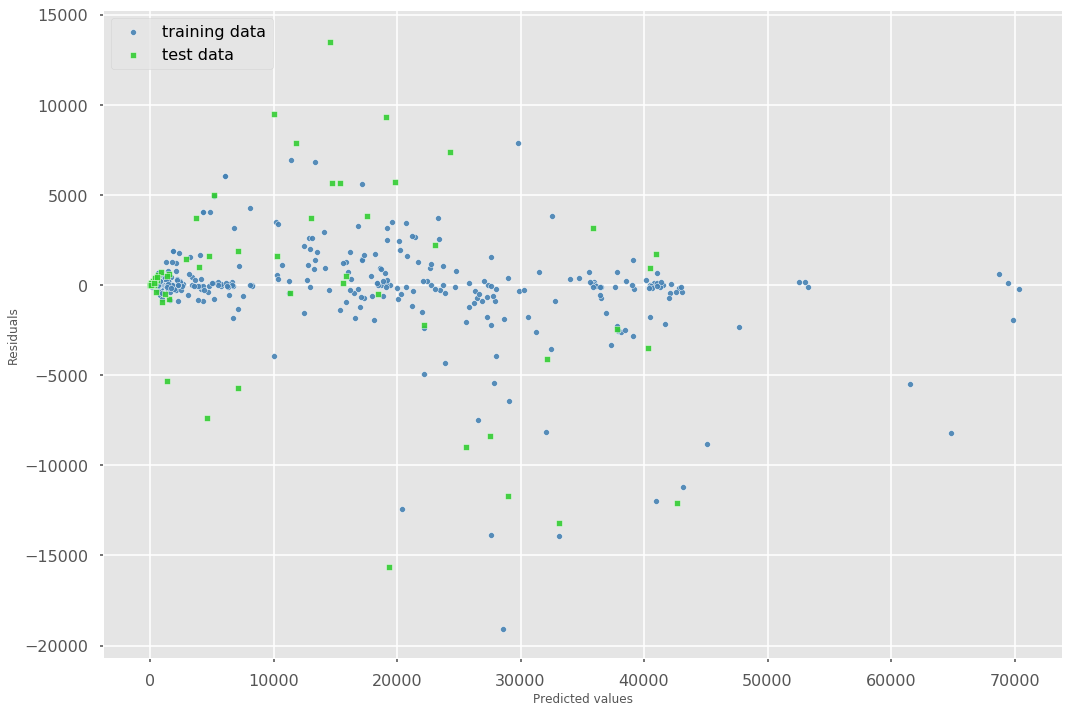

In [288]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.scatter(y_train_pred_1,  
            y_train_pred_1 - y_train_1, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')

plt.scatter(y_test_pred_1,  
            y_test_pred_1 - y_test_1, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The following 3 model variations were used to test for hyperparameter tuning prior to testing the model on the subsequent years. Methods such as GridSearch and RandomSearch were not imployed due to the structure of the data and inherent problems with randomized cross validation. 

In [289]:
# Commented out due to high processing cost
# Grid search cv
'''forest_mod = RandomForestRegressor(criterion='mse', random_state=1, n_jobs=-1)

param_grid = {'n_estimators':np.arange(100,1000,100),
              'max_features':['auto', None, 1, 5],
              'max_depth':np.arange(1,50,10), 
              'min_samples_split': np.arange(5,15,5),
              'min_samples_leaf': np.arange(1,6,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.5,0.1),
               "max_leaf_nodes": [10, 20, 40]
               }
rf_cv = GridSearchCV(forest_mod, param_grid, cv=2)
rf_cv.fit(X_train_1, y_train_1)
y_cv_pred = rf_cv.predict(X_test_1)
print('Best Params', rf_cv.best_params_)
print('Best Score', rf_cv.best_score_)'''

'forest_mod = RandomForestRegressor(criterion=\'mse\', random_state=1, n_jobs=-1)\n\nparam_grid = {\'n_estimators\':np.arange(100,1000,100),\n              \'max_features\':[\'auto\', None, 1, 5],\n              \'max_depth\':np.arange(1,50,10), \n              \'min_samples_split\': np.arange(5,15,5),\n              \'min_samples_leaf\': np.arange(1,6,1),\n              "min_weight_fraction_leaf": np.arange(0.1,0.5,0.1),\n               "max_leaf_nodes": [10, 20, 40]\n               }\nrf_cv = GridSearchCV(forest_mod, param_grid, cv=2)\nrf_cv.fit(X_train_1, y_train_1)\ny_cv_pred = rf_cv.predict(X_test_1)\nprint(\'Best Params\', rf_cv.best_params_)\nprint(\'Best Score\', rf_cv.best_score_)'

In [290]:
# function takes a RF parameter and a ranger and produces a plot and dataframe of CV scores for parameter values

'''def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(forest_mod, param_grid = {parameter: num_range})
    grid_search.fit(X_train_1, y_train_1)
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df'''

"def evaluate_param(parameter, num_range, index):\n    grid_search = GridSearchCV(forest_mod, param_grid = {parameter: num_range})\n    grid_search.fit(X_train_1, y_train_1)\n    \n    df = {}\n    for i, score in enumerate(grid_search.grid_scores_):\n        df[score[0][parameter]] = score[1]\n       \n    \n    df = pd.DataFrame.from_dict(df, orient='index')\n    df.reset_index(level=0, inplace=True)\n    df = df.sort_values(by='index')\n \n    plt.subplot(3,2,index)\n    plot = plt.plot(df['index'], df[0])\n    plt.title(parameter)\n    return plot, df"

In [291]:
'''index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1'''

'index = 1\nplt.figure(figsize=(16,12))\nfor parameter, param_range in dict.items(param_grid):   \n    evaluate_param(parameter, param_range, index)\n    index += 1'

n_estimators: plateus past 1000
max_features: best at 1-3
max_depth: plateaus past 100

With this we have an improvment from the OOB model (0.898) to a score of 0.92. 

**OOB:**
RMSE train: 1890.3961136568018 test: 4498.857809112779

**Tuned**
RMSE train: 966.9058265462105 test: 3943.732153614965

In [347]:
# Setting up the new model

forest = RandomForestRegressor(n_estimators=1000,
                               max_features=1,
                               criterion='mse', 
                               random_state=1,
                               n_jobs=-1)

# fitting the model
forest.fit(X_train_1, y_train_1)

# generating predictions
y_train_pred_1 = forest.predict(X_train_1)
y_test_pred_1 = forest.predict(X_test_1)

rf_rmse_1 = sqrt(mean_squared_error(y_test_1, y_test_pred_1))
rf_score_1 = r2_score(y_test_1, y_test_pred_1)

print(forest.get_params)

print('# of features', forest.n_features_)

print('RMSE train:', sqrt(mean_squared_error(y_train_1, y_train_pred_1)),'|',  'test:', rf_rmse_1) 

print('R^2 train:', r2_score(y_train_1, y_train_pred_1),'|', 'test:', rf_score_1)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)>
# of features 279
RMSE train: 966.9058265462105 | test: 3943.732153614964
R^2 train: 0.995585343944 | test: 0.921813054982


### Running the remaining rounds for the RF

In [300]:
# Round 2
forest.fit(X_train_2, y_train_2)
y_train_pred_2 = forest.predict(X_train_2)
y_test_pred_2 = forest.predict(X_test_2)

rf_rmse_2 = sqrt(mean_squared_error(y_test_2, y_test_pred_2))
rf_score_2 = r2_score(y_test_2, y_test_pred_2)

print('RMSE train:', sqrt(mean_squared_error(y_train_2, y_train_pred_2)),'|',  'test:', rf_rmse_2) 

print('R^2 train:', r2_score(y_train_2, y_train_pred_2),'|', 'test:', rf_score_2)

RMSE train: 864.261347276303 | test: 3988.0943029608875
R^2 train: 0.996448949577 | test: 0.917611295486


In [301]:
# Round 3
forest.fit(X_train_3, y_train_3)
y_train_pred_3 = forest.predict(X_train_3)
y_test_pred_3 = forest.predict(X_test_3)

rf_rmse_3 = sqrt(mean_squared_error(y_test_3, y_test_pred_3))
rf_score_3 = r2_score(y_test_3, y_test_pred_3)

print('RMSE train:', sqrt(mean_squared_error(y_train_3, y_train_pred_3)),'|',  'test:', rf_rmse_3) 

print('R^2 train:', r2_score(y_train_3, y_train_pred_3),'|', 'test:', rf_score_3)

RMSE train: 842.7077987330285 | test: 2446.4430184767552
R^2 train: 0.996596784679 | test: 0.968005332827


In [302]:
# Round 4
forest.fit(X_train_4, y_train_4)
y_train_pred_4 = forest.predict(X_train_4)
y_test_pred_4 = forest.predict(X_test_4)

rf_rmse_4 = sqrt(mean_squared_error(y_test_4, y_test_pred_4))
rf_score_4 = r2_score(y_test_4, y_test_pred_4)

print('RMSE train:', sqrt(mean_squared_error(y_train_4, y_train_pred_4)),'|',  'test:', rf_rmse_4) 

print('R^2 train:', r2_score(y_train_4, y_train_pred_4),'|', 'test:', rf_score_4)

RMSE train: 1507.1769139708467 | test: 11379.02969755943
R^2 train: 0.989427209325 | test: 0.261278822224


Of note here witht he OOB model we had a significant drop in accuracy compared to the other years with the OOB model. With the tuned model we went from a socre of -0.19 to 0.26. So still significantly lower but much better. 

We also see a change in RMSE,

**OOB**

train: 14937 test: 14081

**Tuned**

train: 1507 test: 11379

In [303]:
# Round 5
forest.fit(X_train_5, y_train_5)
y_train_pred_5 = forest.predict(X_train_5)
y_test_pred_5 = forest.predict(X_test_5)

rf_rmse_5 = sqrt(mean_squared_error(y_test_5, y_test_pred_5))
rf_score_5 = r2_score(y_test_5, y_test_pred_5)

print('RMSE train:', sqrt(mean_squared_error(y_train_5, y_train_pred_5)),'|',  'test:', rf_rmse_5) 

print('R^2 train:', r2_score(y_train_5, y_train_pred_5), 'test:','|', rf_score_5)

RMSE train: 738.6373479073477 | test: 2153.247514953891
R^2 train: 0.997326411298 test: | 0.972453992874


In [304]:
# Average Performance
rf_rmse_all = [rf_rmse_1,rf_rmse_2,rf_rmse_3,rf_rmse_4,rf_rmse_5]
rf_score_all = [rf_score_1,rf_score_2,rf_score_3,rf_score_4,rf_score_5]

avg_rmse = sum(rf_rmse_all) / len(rf_rmse_all)
print('Average RMSE:', avg_rmse)

avg_rf_score = sum(rf_score_all) / len(rf_score_all)
print('Average score:', avg_rf_score)


Average RMSE: 4782.109337513186
Average score: 0.808232499679


OOB the average score was brought down by the decreased performance in 2013 and we had an average score of 0.68 with the tuned model we are brought up to an average score of 0.808. 

In [305]:
delta_rf_1 = y_test_pred_1 - y_test_1
delta_rf_2 = y_test_pred_2 - y_test_2
delta_rf_3 = y_test_pred_3 - y_test_3
delta_rf_4 = y_test_pred_4 - y_test_4
delta_rf_5 = y_test_pred_5 - y_test_5

In [306]:
delta_rf_1 = delta_rf_1.reset_index(drop=True)
delta_rf_2 = delta_rf_2.reset_index(drop=True)
delta_rf_3 = delta_rf_3.reset_index(drop=True)
delta_rf_4 = delta_rf_4.reset_index(drop=True)
delta_rf_5 = delta_rf_5.reset_index(drop=True)

In [307]:
delta_rf_all = pd.DataFrame({'round_1' : delta_rf_1,
                          'round_2' : delta_rf_2,
                          'round_3' : delta_rf_3,
                          'round_4' : delta_rf_4,
                          'round_5' : delta_rf_5})

delta_rf_all['avg'] = delta_rf_all.mean(axis=1)

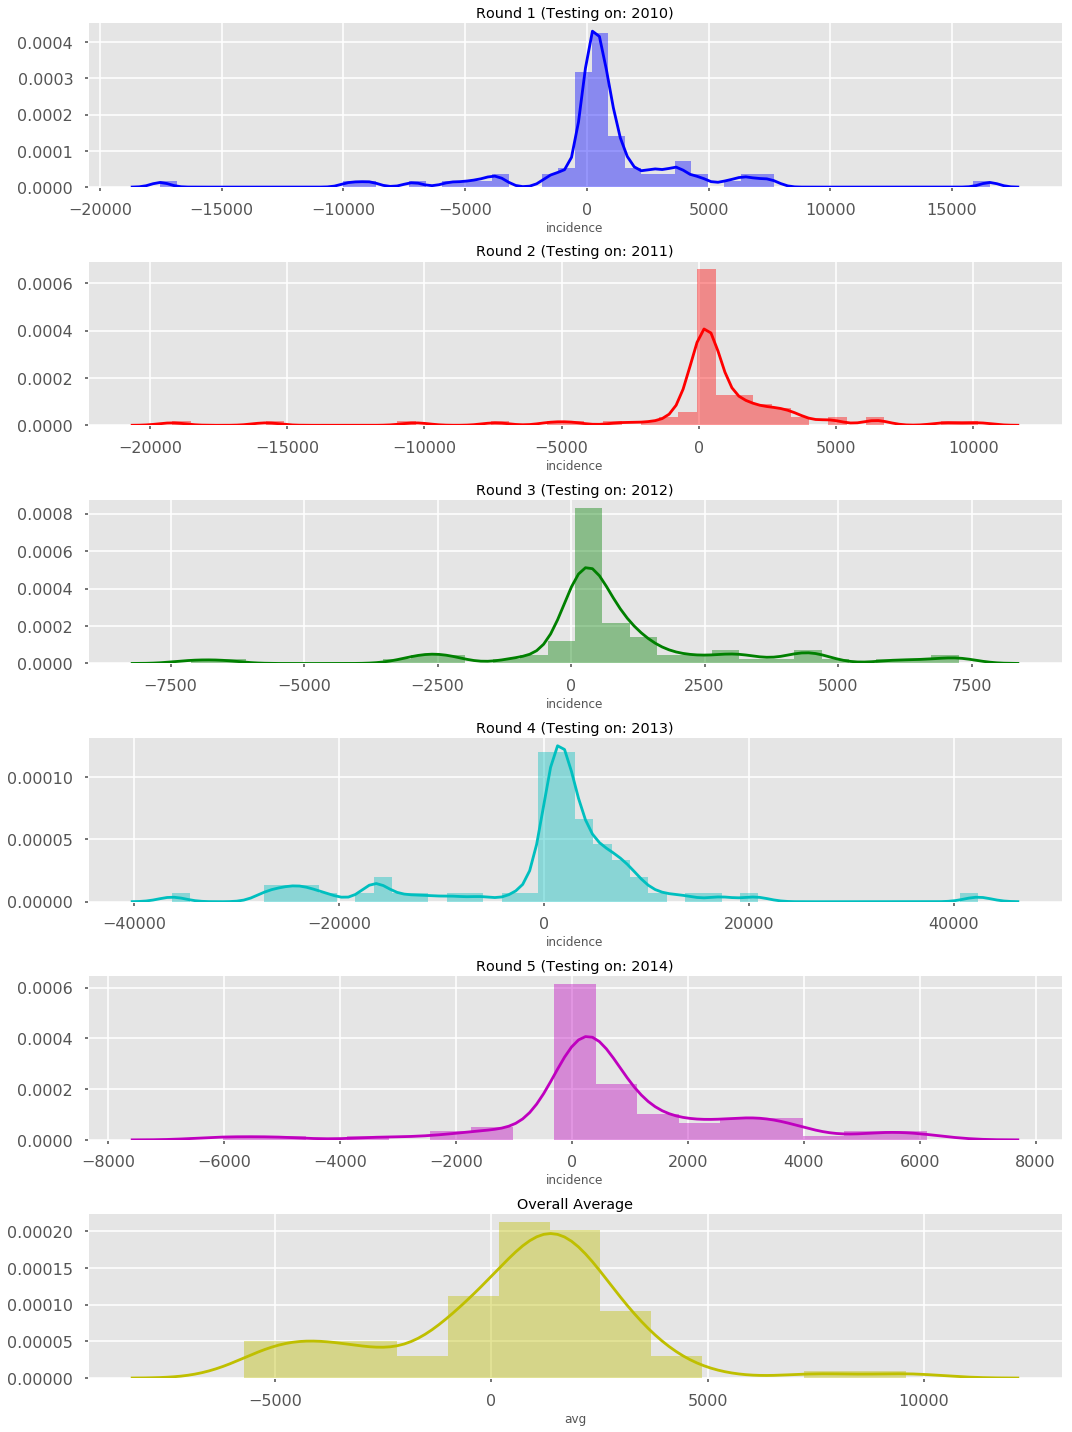

In [308]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6, ncols=1,figsize=(15,20))

sns.distplot(delta_rf_1, ax=ax1, color="b")
ax1.set_title("Round 1 (Testing on: 2010)")

sns.distplot(delta_rf_2, ax=ax2, color="r")
ax2.set_title("Round 2 (Testing on: 2011)")

sns.distplot(delta_rf_3, ax=ax3, color="g")
ax3.set_title("Round 3 (Testing on: 2012)")

sns.distplot(delta_rf_4, ax=ax4, color="c")
ax4.set_title("Round 4 (Testing on: 2013)")

sns.distplot(delta_rf_5, ax=ax5, color="m")
ax5.set_title("Round 5 (Testing on: 2014)")

sns.distplot(delta_rf_all['avg'], ax=ax6, color="y")
ax6.set_title("Overall Average")

for ax in (ax1,ax2,ax3,ax4,ax5,ax6):
    sns.despine(ax=ax)
fig.tight_layout()

### Checking the importance of features

In [309]:
#list(zip(final_beer_df.columns, rf.feature_importances_))
plot_df = pd.DataFrame()
plot_df['col_names'] = X_train_5.columns
plot_df['Predictions'] = forest.feature_importances_
plot_df = plot_df.sort_values(by='Predictions', ascending=False).head(10)
plot_df.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
5,gdp_per_cap,0.065140
4,percent_urb,0.058190
2,temperature,0.056180
3,percent_agg,0.045780
6,pop_density,0.041339
1,rainfall,0.035555
96,region_y_AMR,0.023797
202,country_name_y_Burkina Faso,0.020120
13,country_code_BFA,0.019800
113,country_name_x_Burkina Faso,0.018648


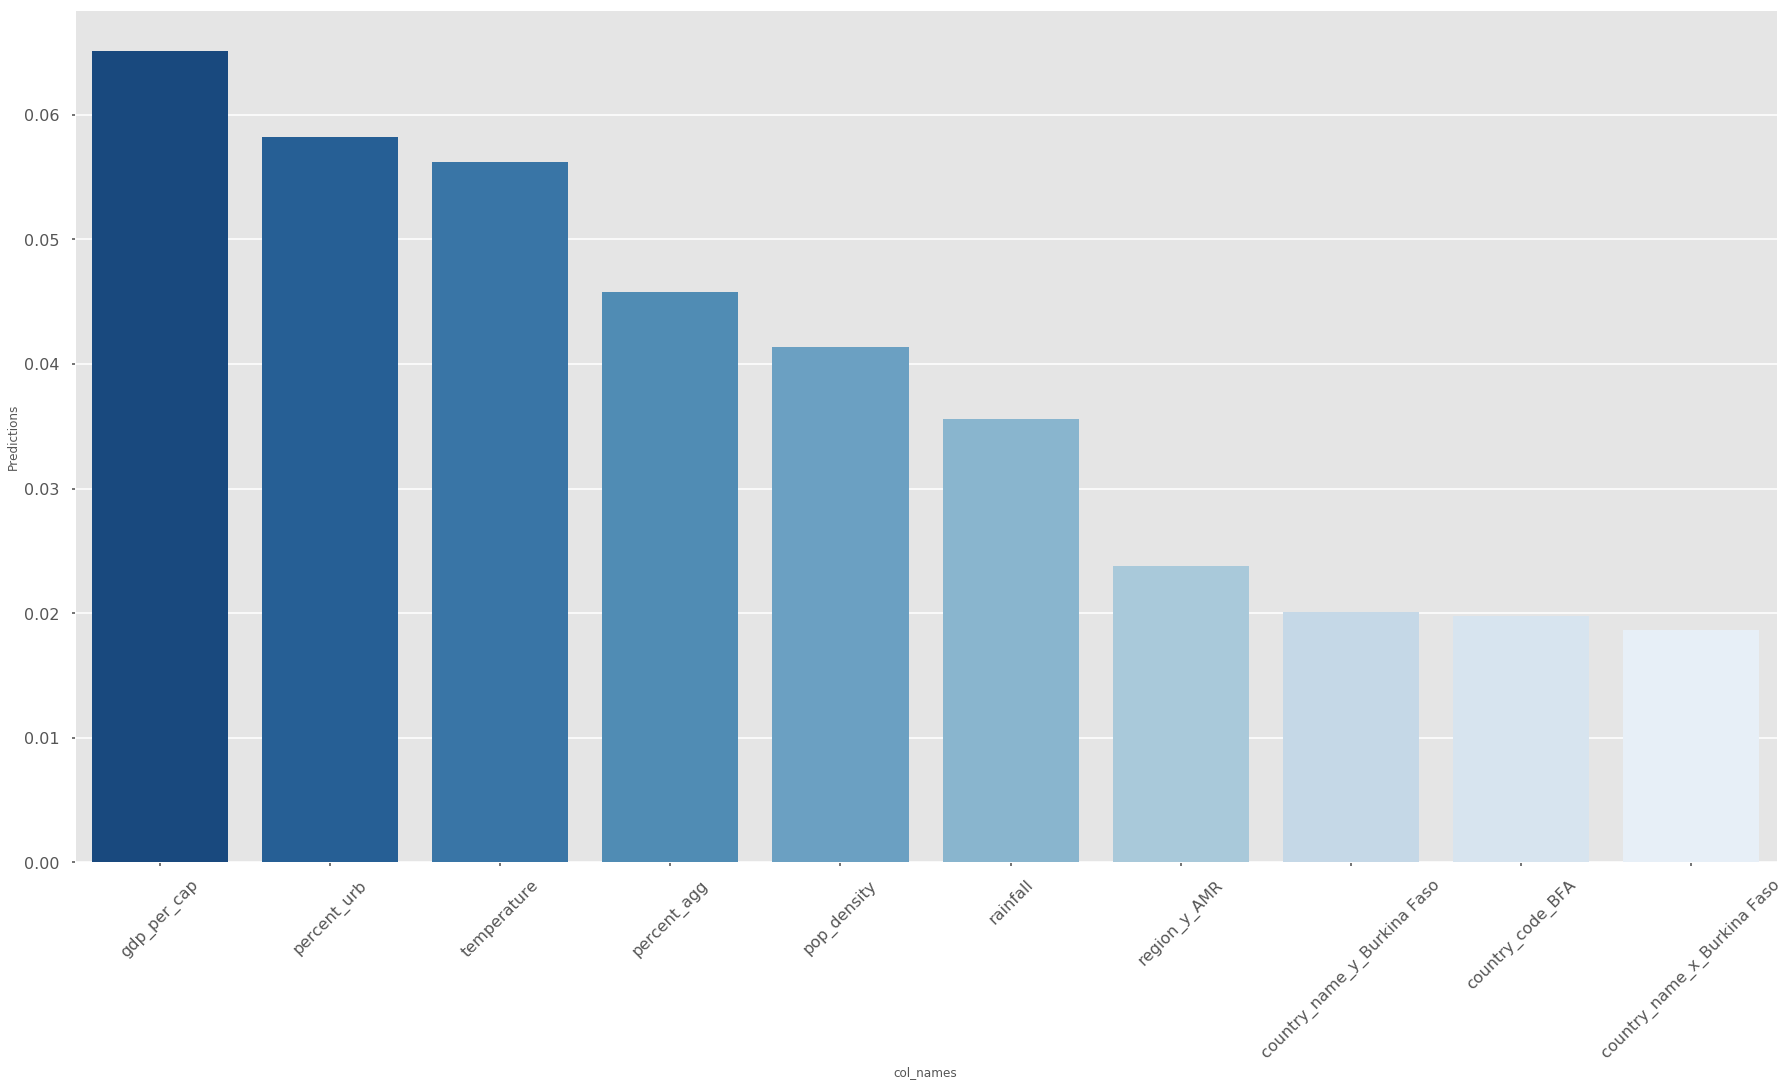

In [310]:
f, axes = plt.subplots(figsize=(25,15))
g3 = sns.barplot(x = "col_names", y = "Predictions", data = plot_df.sort_values(by='Predictions', ascending=False), palette="Blues_r")
g3.set_xticklabels(labels=plot_df.sort_values(by='Predictions', ascending=False)['col_names'],rotation=45)
plt.tight_layout(pad=0.4)

### Linear Regression

In [311]:
### Round 1 Multi Regression

In [312]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train_1, y_train_1)

# Compute predictions over the prediction space: y_pred
y_pred_1 = reg.predict(X_test_1)

# Print R^2 
reg_score_1 = reg.score(X_test_1, y_test_1)
print('Score:', reg_score_1)


Score: 0.83599214764


In [313]:
reg.get_params
print('Slope:', reg.coef_[0])
print('Intercept:', reg.intercept_)

Slope: -0.242270264343
Intercept: 48655.9709054


def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_test_1, y_test_1, reg)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [314]:
# Round 2

# Fit the model to the data
reg.fit(X_train_2, y_train_2)

# Compute predictions over the prediction space: y_pred
y_pred_2 = reg.predict(X_test_2)

# Print R^2 
reg_score_2 = reg.score(X_test_2, y_test_2)
print('Score:', reg_score_2)


Score: 0.827566473348


In [315]:
# Round 3

# Fit the model to the data
reg.fit(X_train_3, y_train_3)

# Compute predictions over the prediction space: y_pred
y_pred_3 = reg.predict(X_test_3)

# Print R^2 
reg_score_3 = reg.score(X_test_3, y_test_3)
print('Score:', reg_score_3)

Score: 0.847184406743


In [316]:
# Round 4

# Fit the model to the data
reg.fit(X_train_4, y_train_4)

# Compute predictions over the prediction space: y_pred
y_pred_4 = reg.predict(X_test_4)

# Print R^2 
reg_score_4 = reg.score(X_test_4, y_test_4)
print('Score:', reg_score_4)

Score: 0.15428637407


In [317]:
# Round 5

# Fit the model to the data
reg.fit(X_train_5, y_train_5)

# Compute predictions over the prediction space: y_pred
y_pred_5 = reg.predict(X_test_5)

# Print R^2 
reg_score_5 = reg.score(X_test_5, y_test_5)
print('Score:', reg_score_5)

Score: 0.834622331808


In [318]:
reg_scores = [reg_score_1, reg_score_2, reg_score_3, reg_score_4, reg_score_5]
avg_reg_score = sum(reg_scores) / len(reg_scores)
print('Average score:', avg_reg_score)

Average score: 0.699930346722


Major Detractor here is the result from round 4 which is trying to predict the results for 2013.

In [319]:
# Delta / Error from actual

In [320]:
delta_reg_1 = y_pred_1 - y_test_1
delta_reg_2 = y_pred_2 - y_test_2
delta_reg_3 = y_pred_3 - y_test_3
delta_reg_4 = y_pred_4 - y_test_4
delta_reg_5 = y_pred_5 - y_test_5

In [321]:
delta_reg_1 = delta_reg_1.reset_index(drop=True)
delta_reg_2 = delta_reg_2.reset_index(drop=True)
delta_reg_3 = delta_reg_3.reset_index(drop=True)
delta_reg_4 = delta_reg_4.reset_index(drop=True)
delta_reg_5 = delta_reg_5.reset_index(drop=True)

In [322]:
delta_all = pd.DataFrame({'round_1' : delta_reg_1,
                          'round_2' : delta_reg_2,
                          'round_3' : delta_reg_3,
                          'round_4' : delta_reg_4,
                          'round_5' : delta_reg_5})

delta_all['avg'] = delta_all.mean(axis=1)

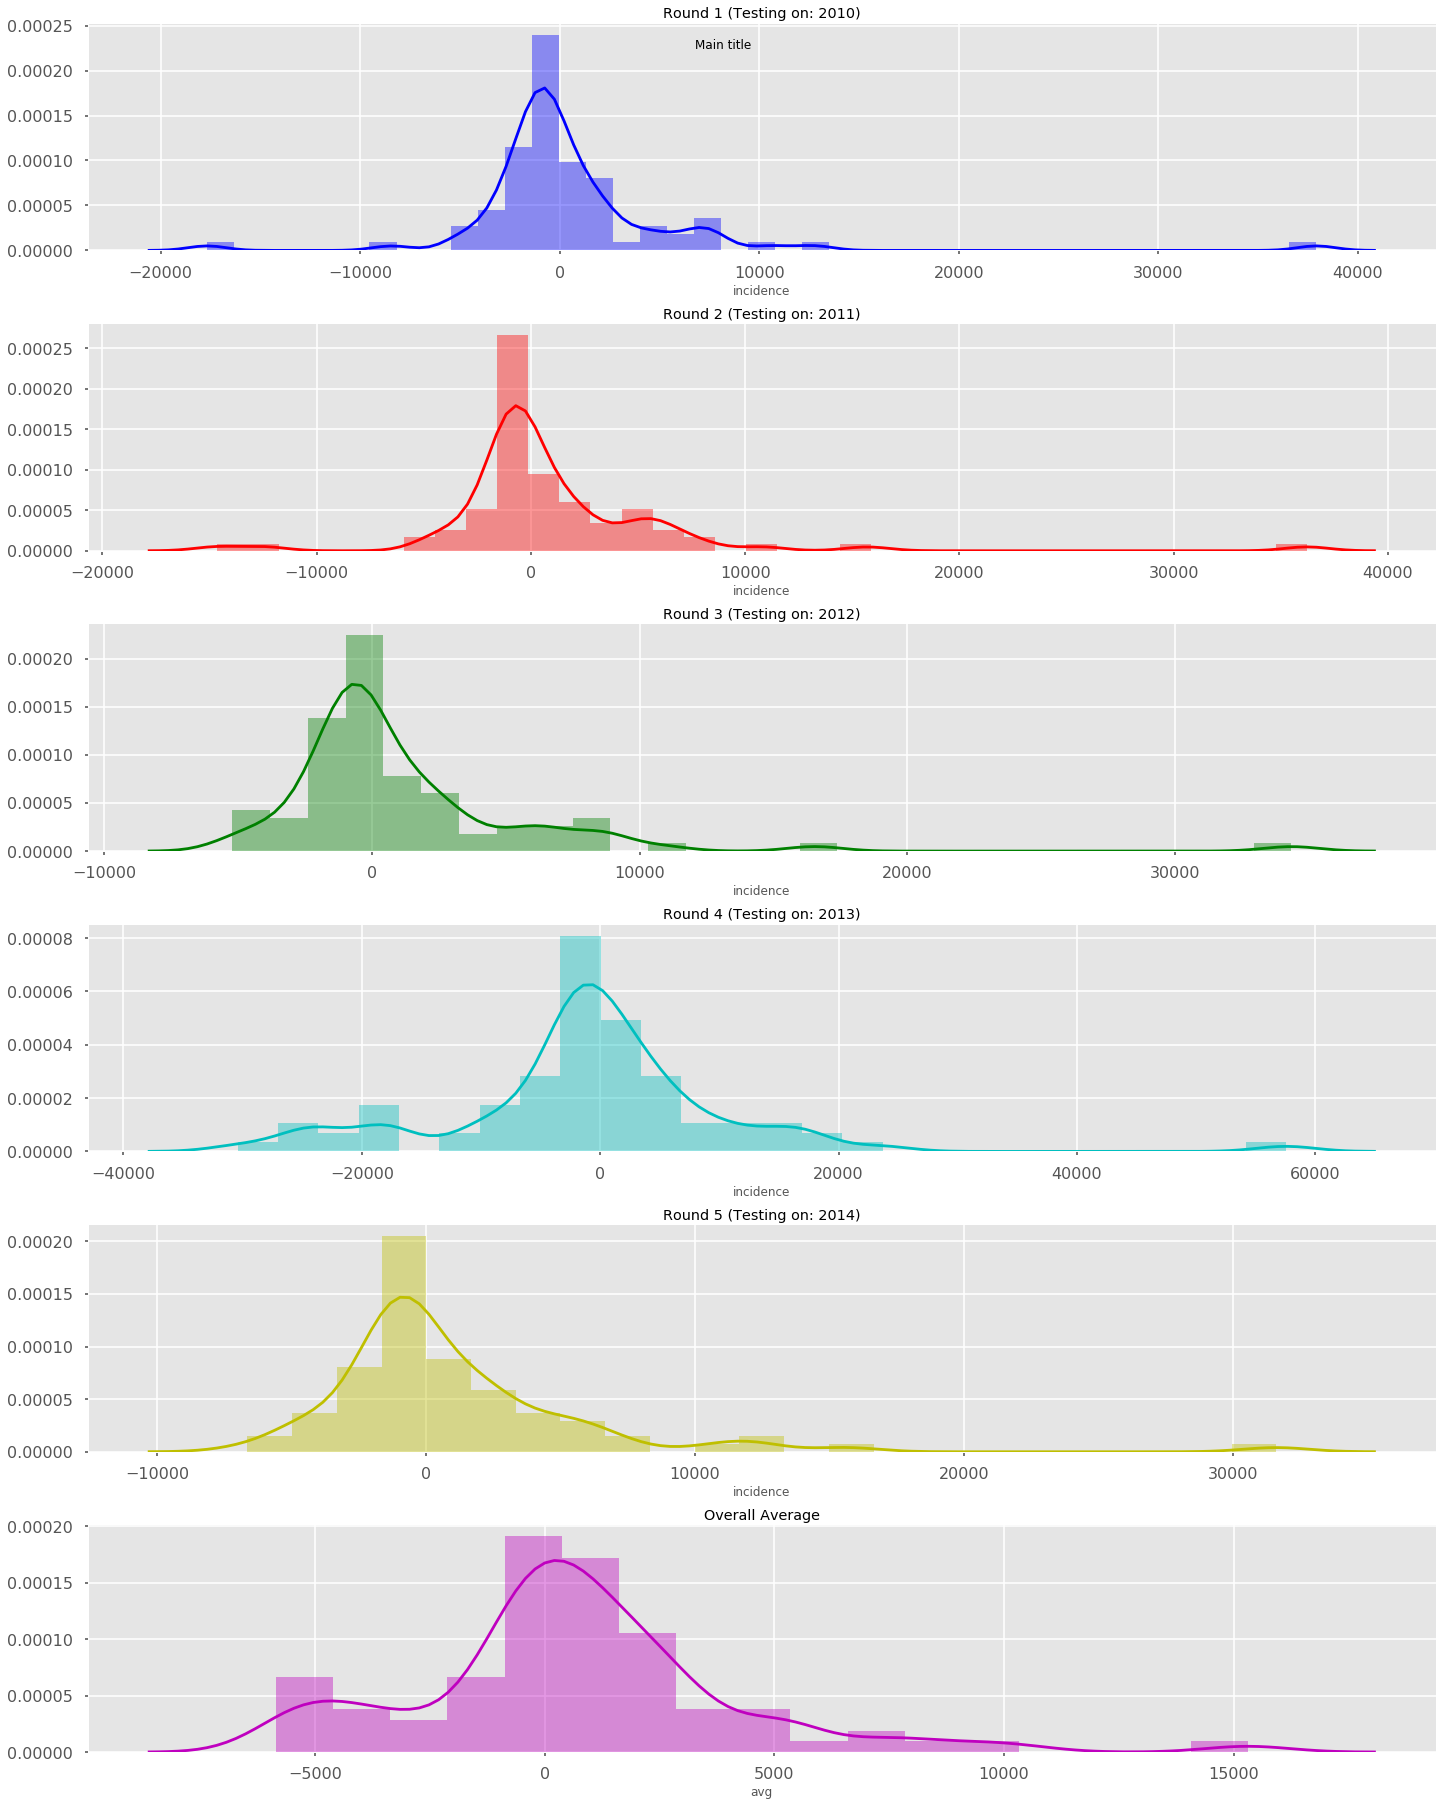

In [323]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6, ncols=1,figsize=(20,25))

plt.suptitle('Main title', verticalalignment='top', horizontalalignment='center')
sns.distplot(delta_reg_1, ax=ax1, color="b")
ax1.set_title("Round 1 (Testing on: 2010)")

sns.distplot(delta_reg_2, ax=ax2, color="r")
ax2.set_title("Round 2 (Testing on: 2011)")

sns.distplot(delta_reg_3, ax=ax3, color="g")
ax3.set_title("Round 3 (Testing on: 2012)")

sns.distplot(delta_reg_4, ax=ax4, color="c")
ax4.set_title("Round 4 (Testing on: 2013)")

sns.distplot(delta_reg_5, ax=ax5, color="y")
ax5.set_title("Round 5 (Testing on: 2014)")

sns.distplot(delta_all['avg'], ax=ax6, color="m")
ax6.set_title("Overall Average")

for ax in (ax1,ax2,ax3,ax4,ax5,ax6):
    sns.despine(ax=ax)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Bayesian Ridge Regression

In [324]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
bayes = BayesianRidge()

# Round 1 
bayes.fit(X_train_1, y_train_1)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [325]:
y_bayes_1 = bayes.predict(X_test_1)

In [326]:
# Round 1 score 
bayes_train_score_1 = bayes.score(X_train_1, y_train_1)
bayes_test_score_1 = bayes.score(X_test_1, y_test_1)
print('R^2:', 'Train', bayes_train_score_1, 'Test', bayes_test_score_1)

R^2: Train 0.959120792258 Test 0.844837406552


In [327]:
# poly = PolynomialFeatures(degree=3, interaction_only=True)
# poly.fit_transform(X_train_1)

In [328]:
# pipeline = Pipeline([("polynomial_features", poly),
#                         ("regression", bayes)])
# pipeline.fit(X_train_1, y_train_1)

### Gradient Bookting and feature importance

In [329]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train_5, y_train_5)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [330]:
print('Score: ' + str(gb.score(X_test_5, y_test_5)))

Score: 0.878348896095


In [331]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_5, gb.predict(X_test_5))
print("MSE: %.4f" % mse)

MSE: 20476008.8261


In [332]:
#list(zip(final_beer_df.columns, rf.feature_importances_))
plot_df3 = pd.DataFrame()
plot_df3['col_names'] = X_train_1.columns
plot_df3['Predictions'] = gb.feature_importances_
plot_df_3 = plot_df3.sort_values(by='Predictions', ascending=False).head(25)
plot_df_3.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
4,percent_urb,0.063912
5,gdp_per_cap,0.058964
2,temperature,0.053404
6,pop_density,0.050016
99,region_y_SEAR,0.032418
1,rainfall,0.023144
202,country_name_y_Burkina Faso,0.023018
258,country_name_y_Sierra Leone,0.020822
82,country_code_TGO,0.019898
97,region_y_EMR,0.018814


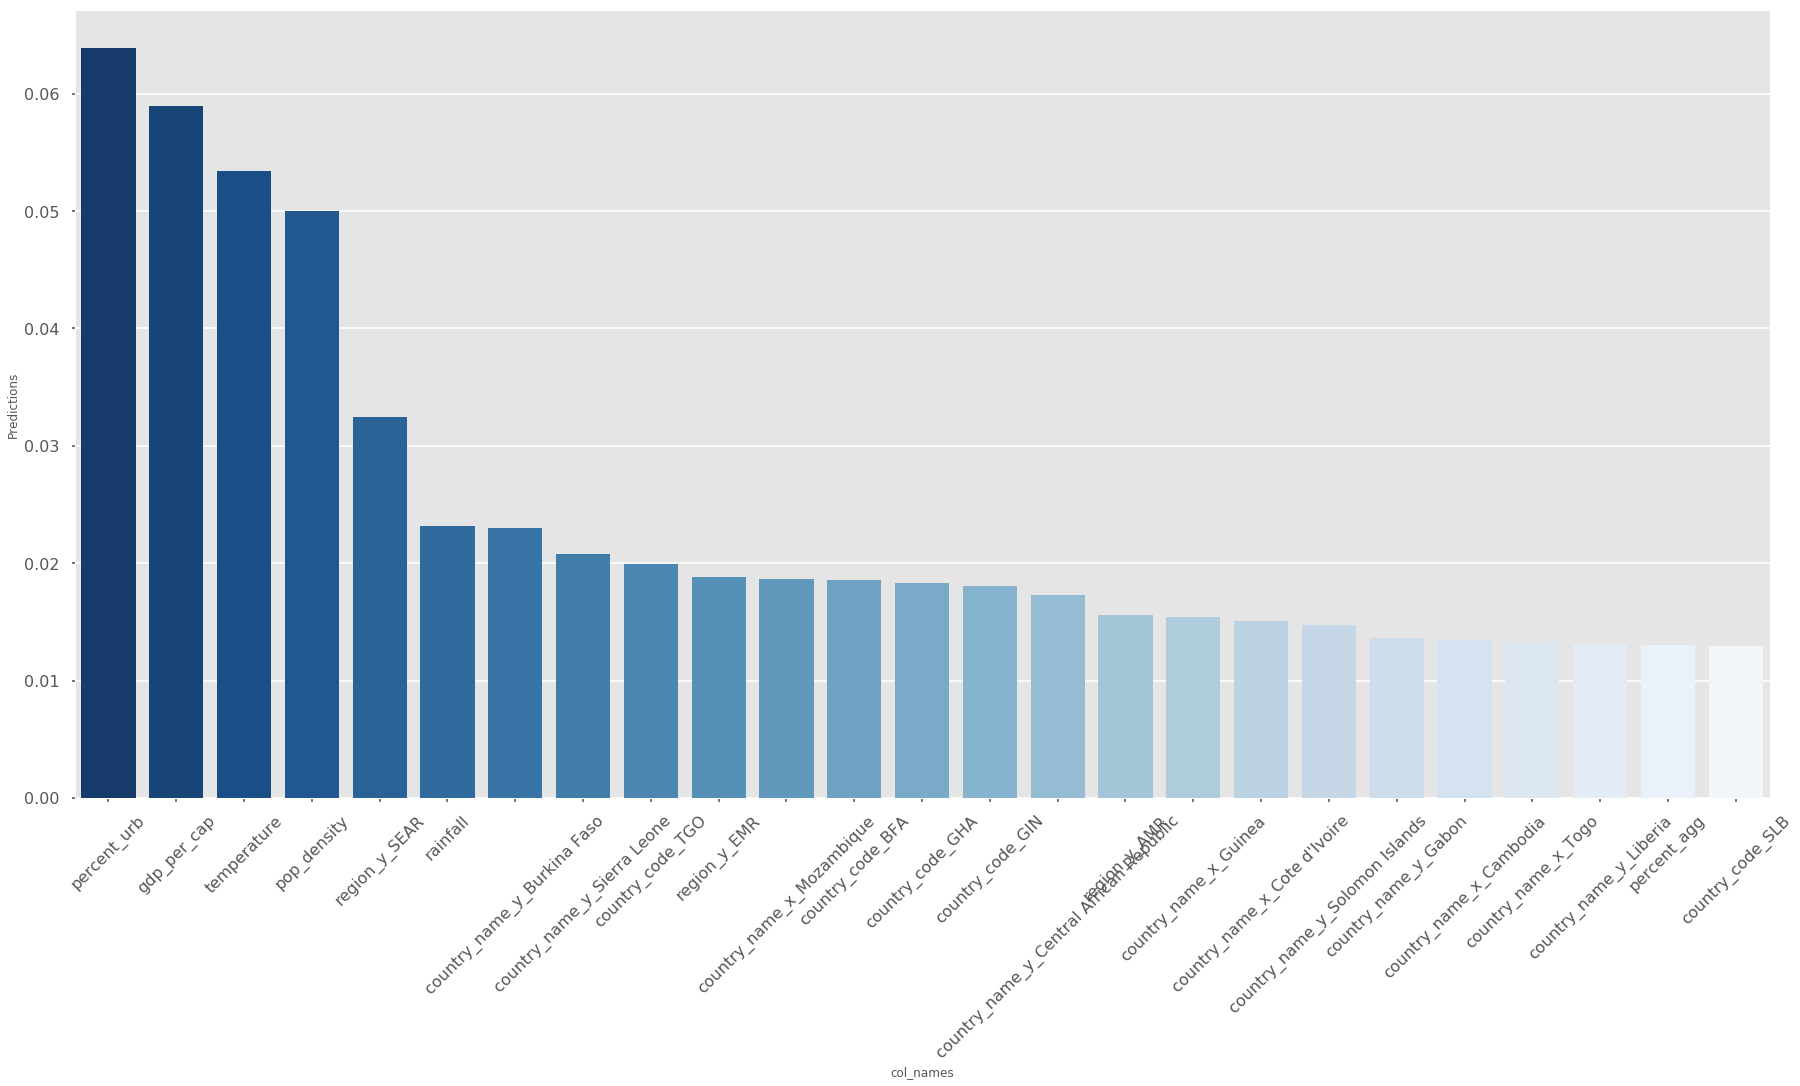

In [333]:
f, axes = plt.subplots(figsize=(25,15))
g3 = sns.barplot(x = "col_names", y = "Predictions", data = plot_df_3.sort_values(by='Predictions', ascending=False), palette="Blues_r")
g3.set_xticklabels(labels=plot_df_3.sort_values(by='Predictions', ascending=False)['col_names'],rotation=45)
plt.tight_layout(pad=0.4)

### OLS

In [334]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('incidence ~ rainfall + temperature + percent_agg + percent_urb + gdp_per_cap + pop_density', train_set_1).fit()
print(m.summary())

C:\Users\zalle\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:              incidence   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     47.48
Date:                Wed, 14 Feb 2018   Prob (F-statistic):           2.07e-48
Time:                        10:55:44   Log-Likelihood:                -7187.4
No. Observations:                 664   AIC:                         1.439e+04
Df Residuals:                     657   BIC:                         1.442e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3204.8294   2724.029      1.177      

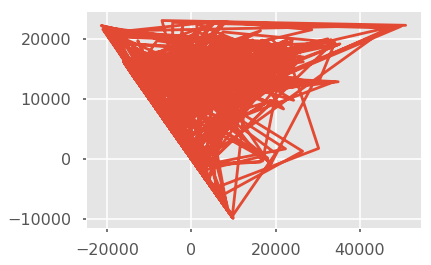

In [335]:
plt.plot(m.resid,m.fittedvalues);

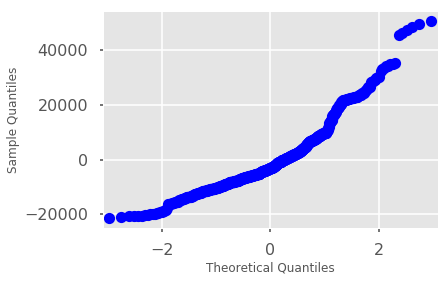

In [336]:
# Residual quantile plot
import statsmodels.api as sm
sm.qqplot(m.resid)
plt.show()

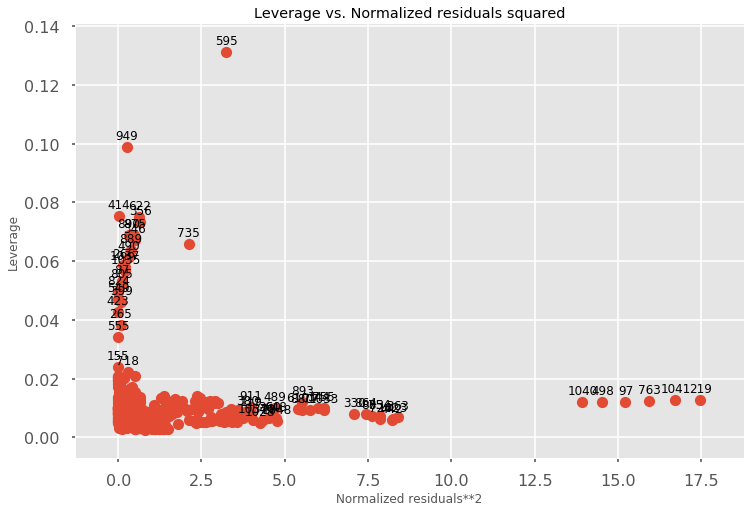

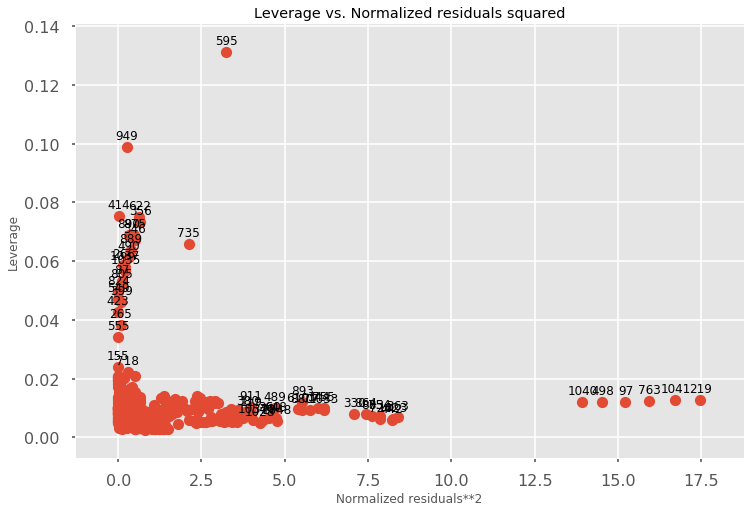

In [337]:
# leverage plot
from statsmodels.graphics.regressionplots import *
fig, ax = plt.subplots(figsize=(12,8))
plot_leverage_resid2(m, ax=ax)

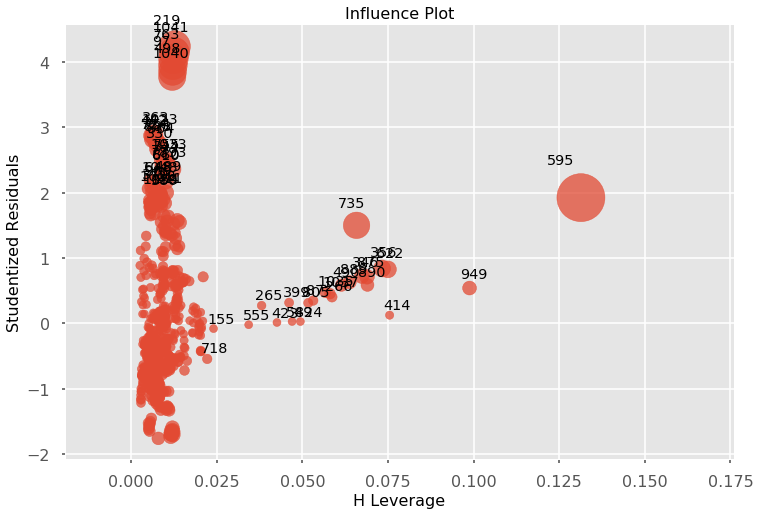

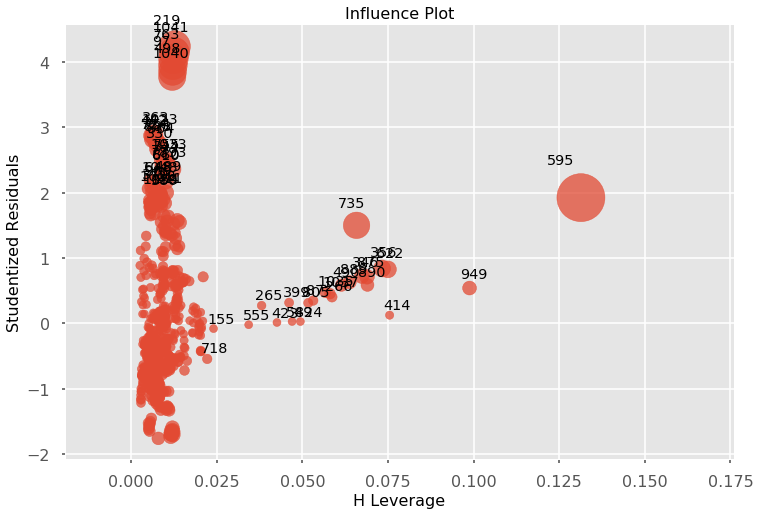

In [338]:
fig, ax = plt.subplots(figsize=(12,8))
influence_plot(m, ax=ax)

### Round 1 RANSAC

Read the article about parameters and refine the model some

In [339]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
max_trials=500,
min_samples=100,
loss='absolute_loss',
residual_threshold=10.0,
random_state=0)
ransac.fit(X_train_1, y_train_1)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=500, min_samples=100, random_state=0,
        residual_metric=None, residual_threshold=10.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [340]:
y_ransac_1 = reg.predict(X_test_1)

In [341]:
print(ransac.score(X_test_1, y_test_1))

0.511380518124


### Round 1 SGD

In [342]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd = sgd.fit(X_train_1, y_train_1)
sgd_pred_1 = sgd.predict(X_test_1)

C:\Users\zalle\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [343]:
sgd.score(X_test_1, y_test_1)

-2.8276307189429188e+23

### Round 1 Elasstic

In [344]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.fit(X_train_1, y_train_1)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [345]:
reg_y_1 = regr.predict(X_test_1) 

In [346]:
regr.score(X_test_1, y_test_1)

0.3693790609263724